# Practice Project - 1

# Red Wine Quality Prediction

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()   # Checking df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.dtypes # checking df data types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observations: Datatypes are correct for all columns. Eventhough "quality" is categorical in nature, data type is "int64" as the values in the column are integers, hence it is fine and no need to change the data type of it to "Object"

# Target Column Update

In [5]:
# Per the project problem statement, 
# set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' 
# and the remainder as 'not good/0'
# Hence updating the target column "quality" accordingly
# New target column is "wine_quality"

In [6]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df["wine_quality"]=[1 if i>=7 else 0 for i in df["quality"]] # List comprehension to get the updated target column

In [9]:
df["wine_quality"] # updated target column

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: wine_quality, Length: 1599, dtype: int64

In [10]:
df["wine_quality"].unique()

array([0, 1], dtype=int64)

In [11]:
df["wine_quality"].value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

Observations: Both classes are imbalanced

In [12]:
df.dtypes["wine_quality"]

dtype('int64')

# Null Values Check

In [13]:
df.isnull(). sum()  # Checking the sum of null values for all columns

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_quality            0
dtype: int64

Observations: Null values are zero in all columns

In [14]:
df.isnull().sum().sum()  # checking the total sum of null values for entire dataset

0

Observations: Null values are zero in the entire dataset

In [15]:
df.drop("quality",axis=1,inplace=True)  # Dropping original target column "quality"
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [16]:
df.shape

(1599, 12)

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality'],
      dtype='object')

# Statistical Summary

In [18]:
df.describe()  # statistical summary for discrete/continuous data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Observations:
1. count is same for all variables. That means no null values present in the dataset
2. Mean for "density" is less than median, hence data is left skewed but the difference is very small hence close to normal    distribution
3. Mean for "fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"  are more than median, hence data is right skewed
4. std deviation is high for 'total sulfur dioxide', 'free sulfur dioxide' that means the data spread is high 
5. Large difference between 75th percentile and max for 'fixed acidity', 'residual sugar', 'free sulfur dioxide', "total sulfur dioxide",hence outliers are present

# Skeweness Check

In [19]:
df.skew().sort_values(ascending=False) # Checking the skewness and sorting them in descending order

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
wine_quality            2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

Observations:
1. Max skeweness - "chlorides"
2. Min skeweness - "density"
3. Columns with high skewness: "chlorides","residual sugar","sulphates","total sulfur dioxide","free sulfur dioxide"
4. No need to check skewness on target variable "wine_quality" as we don't remove skewness on target variable
Current skeweness range is: [-5.6 to +5.6]
In general, we accept skewness range of -0.5 to +0.5, however this is not fixed hence different methods will be applied to remove skewness and will select the one with least skewness range.

# Visulaziation of the Data
Checking the distribution of continuous data

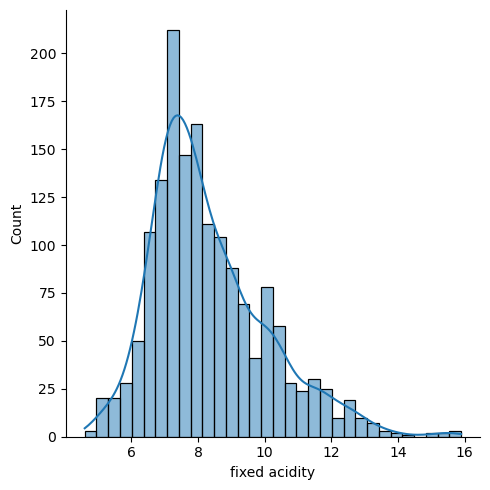

In [20]:
import seaborn as sns
sns.displot(data=df,kde=True,x="fixed acidity")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

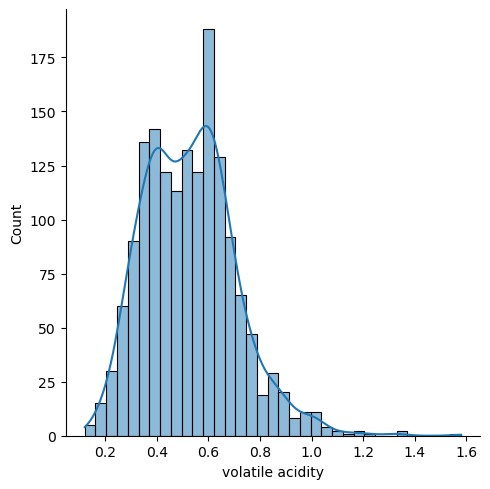

In [96]:
sns.displot(data=df,kde=True,x="volatile acidity")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

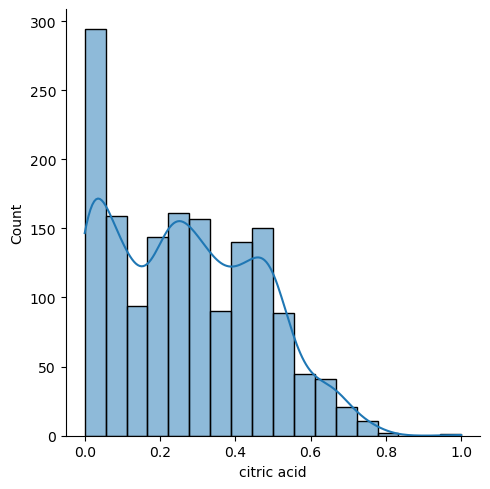

In [97]:
sns.displot(data=df,kde=True,x="citric acid")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

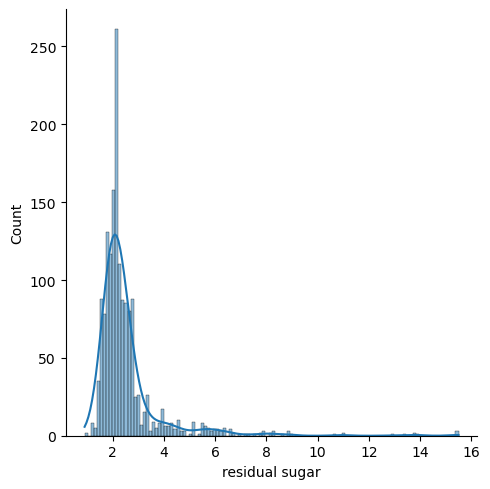

In [98]:
sns.displot(data=df,kde=True,x="residual sugar")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

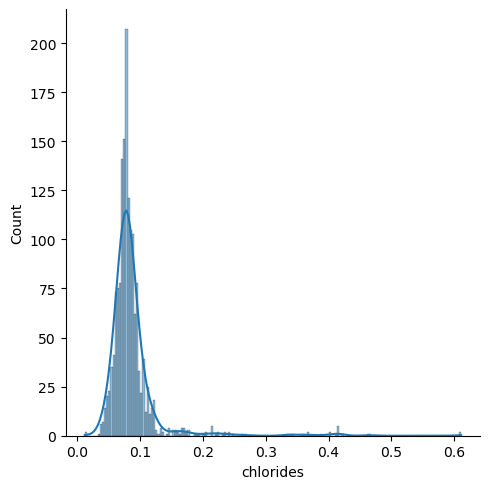

In [99]:
sns.displot(data=df,kde=True,x="chlorides")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

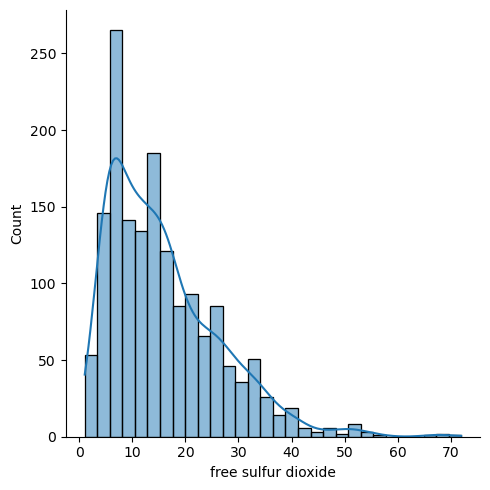

In [100]:
sns.displot(data=df,kde=True,x="free sulfur dioxide")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

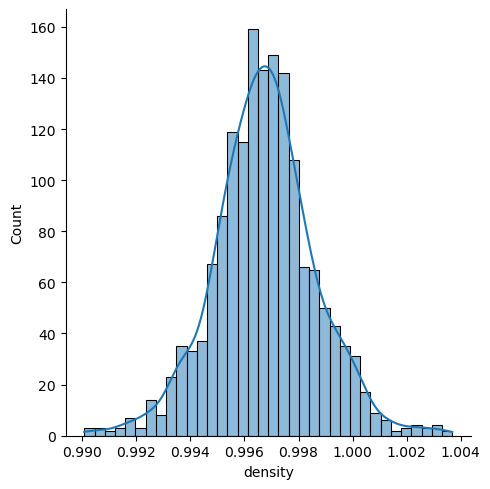

In [101]:
sns.displot(data=df,kde=True,x="density")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

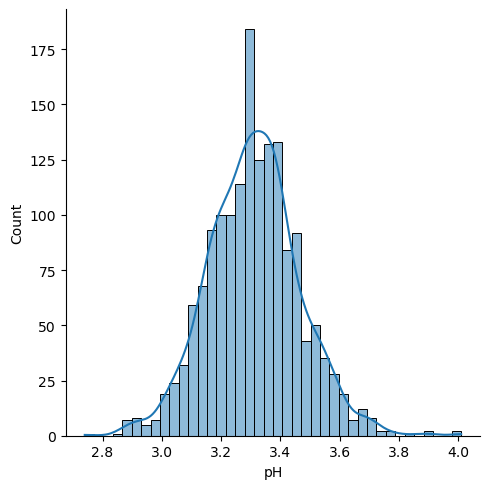

In [102]:
sns.displot(data=df,kde=True,x="pH")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

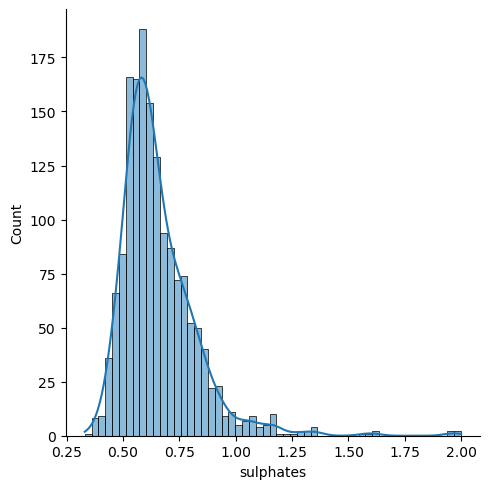

In [103]:
sns.displot(data=df,kde=True,x="sulphates")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

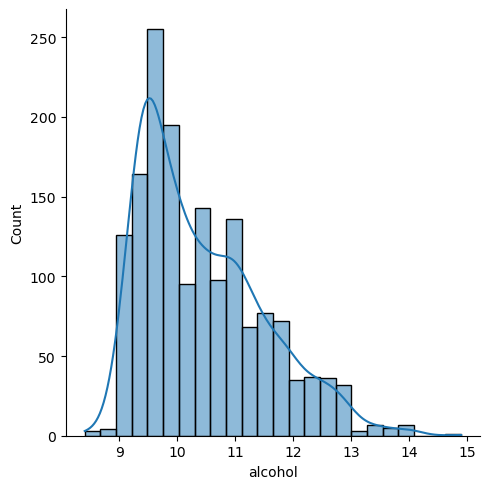

In [104]:
sns.displot(data=df,kde=True,x="alcohol")
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

In [21]:
# Checking the count of categorical data

0    1382
1     217
Name: wine_quality, dtype: int64


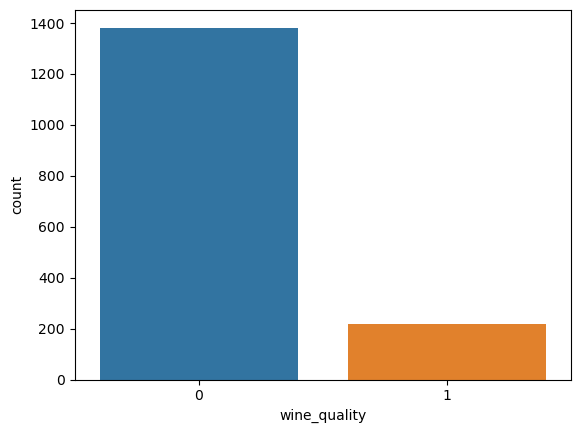

In [22]:
print(df["wine_quality"].value_counts())
sns.countplot(df["wine_quality"])
plt.show()

Observations: Total no. of wine quality class 0 are 1382 and the totla no. of wine quality class 1 are 217. Classes are imbalanced

# Checking coefficients of correlation (r)

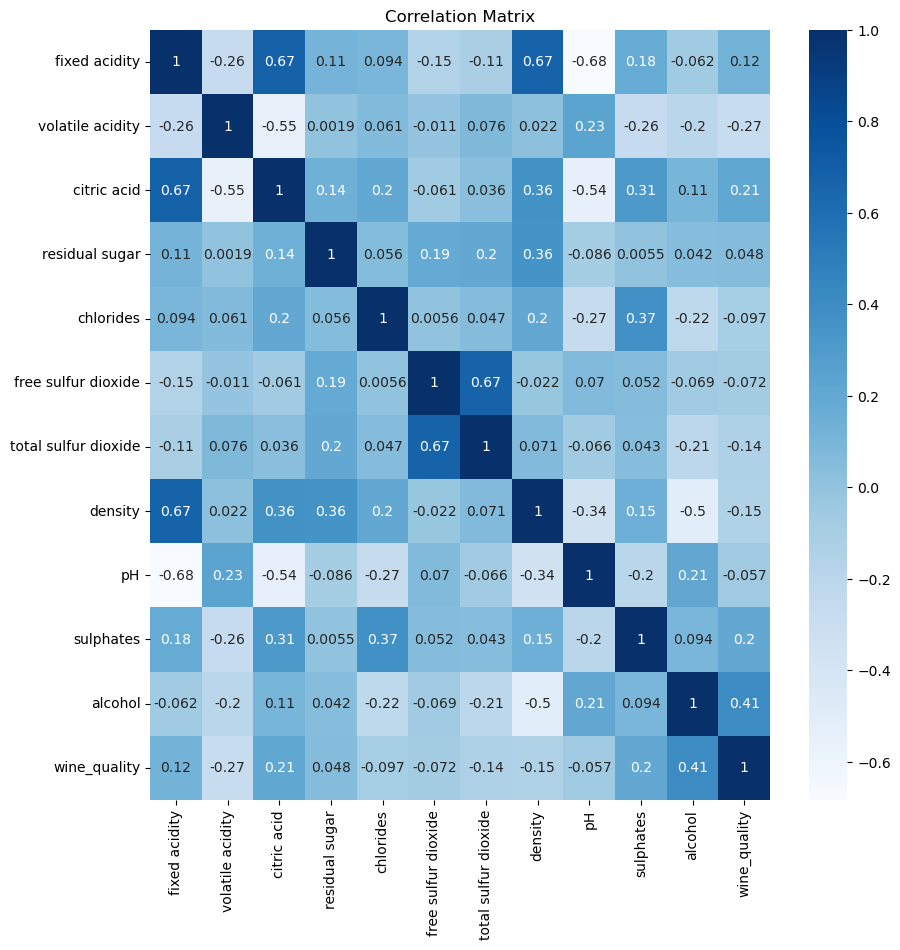

In [105]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_r,cmap="Blues",annot=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [106]:
corr_r["wine_quality"].sort_values(ascending=False) # Arranging the relationship of target variable with other variables in descending order

wine_quality            1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: wine_quality, dtype: float64

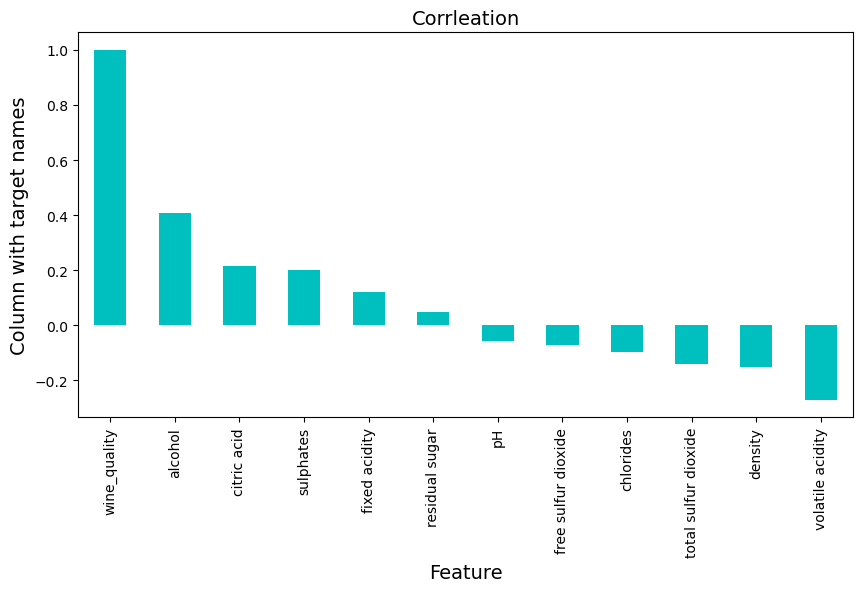

In [107]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(10,5))
corr_r["wine_quality"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()

Observations: (Correlation of Target variable with features)
    1. "residual sugar" and "pH" have weak correlation with target variable "wine_quality"  
    2. Max correlation: "alcohol"
    3. Min correlation: "volatile acidity"
Eventhough the columns "residual sugar" and "pH" have weak correlation, they are not dropped from the dataset as the dataset is small and dropping these columns will loose the information

# Pre-Processing

In [108]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality'],
      dtype='object')

In [109]:
# Segregating only X data
x=df.drop("wine_quality",axis=1)

In [110]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [111]:
# Segregating only Y data
y=df["wine_quality"]

# Checking Outliers

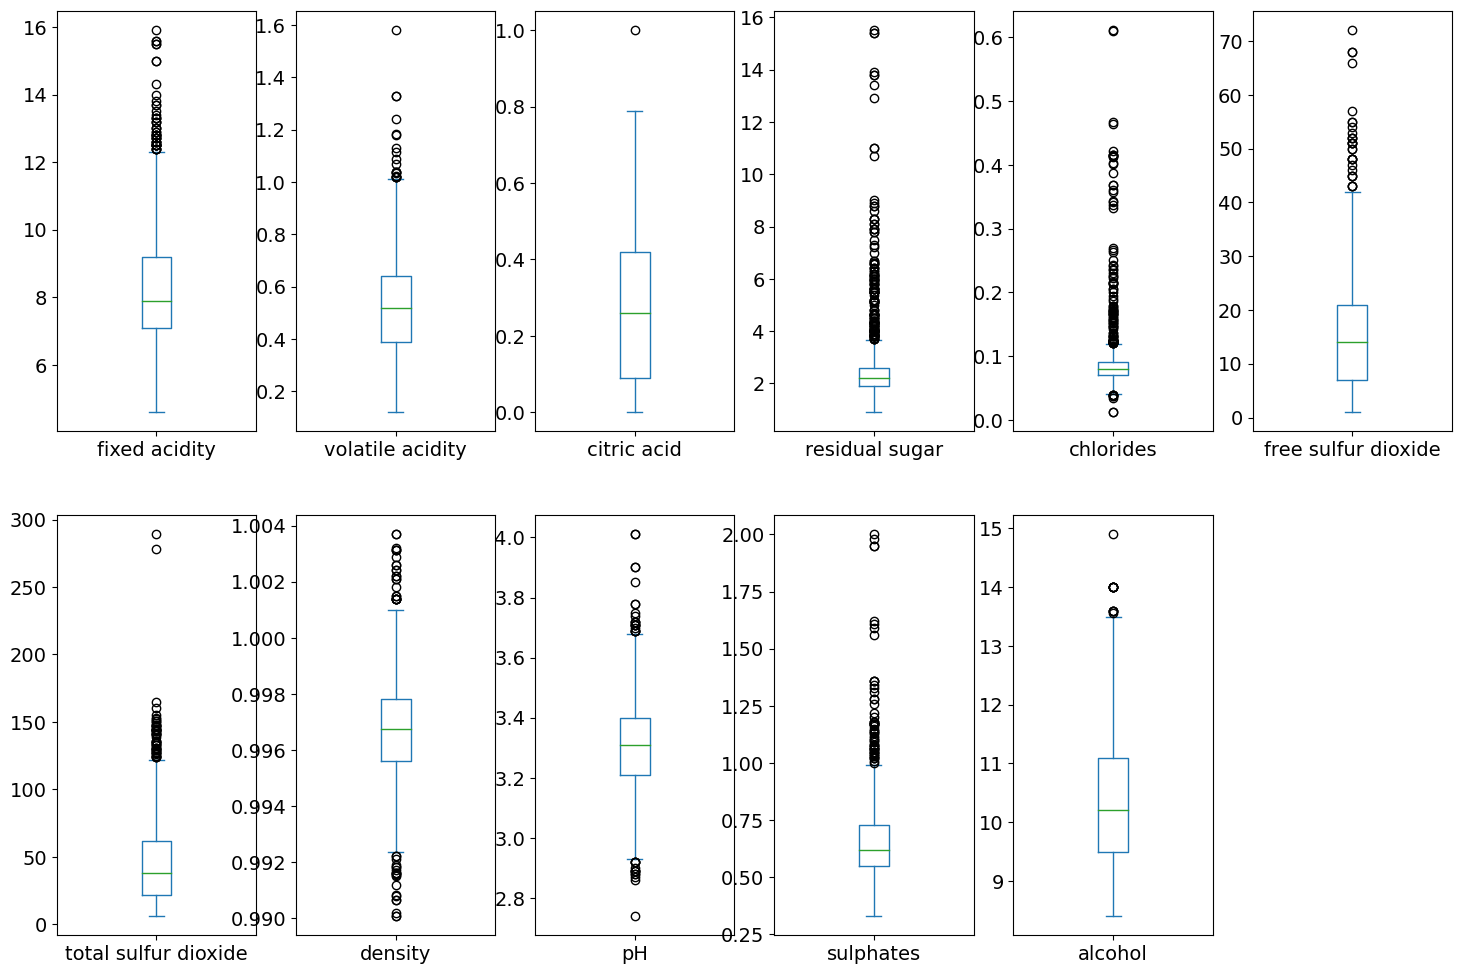

In [112]:
x.plot(kind="box",subplots=True,layout=(2,6),fontsize=14,figsize=(18,12))
plt.show()

Observations:
1. Columns with more outliers: "residual sugar", "chlorides","fixed acidity","volatile acidity","free sulfur dioxide","density","alcohol"
2. Columns with less outliers: "citric acid","total sulfur dioxide","pH","sulphates"

# Removing Outliers

In [113]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [114]:
(np.abs(zscore(x))<3).all().all() # Checking the absolute zscore < 3 for the x data before removing outliers

False

In [115]:
# Removing the rows in both x and y where the outliers are present in x features
x_new=x[(z<3).all(axis=1)]
y_new=y[(z<3).all(axis=1)]
x=x_new
y=y_new

In [116]:
x.shape

(1458, 11)

In [117]:
y.shape

(1458,)

In [118]:
# Data loss calculation
loss_percent=(1599-1458)/1599*100
loss_percent

8.818011257035648

Observations:
Data loss is less than 10% hence it is acceptable

# Transforming data to remove skewness

In [119]:
# Method 1: Using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x)
x_1=pd.DataFrame(data=x_new_pt,columns=x.columns)
x_1.skew().sort_values(ascending=False)

alcohol                 0.108436
sulphates               0.021132
fixed acidity           0.019079
citric acid             0.018652
volatile acidity        0.005289
pH                     -0.000062
density                -0.000989
residual sugar         -0.003351
total sulfur dioxide   -0.005751
free sulfur dioxide    -0.021273
chlorides              -0.115179
dtype: float64

Observations: Skewness range: (+0.115,-0.115)

In [120]:
# Method 2: Using powertransform
from sklearn.preprocessing import power_transform
x_new_pt=power_transform(x)
x_2=pd.DataFrame(data=x_new_pt,columns=x.columns)
x_2.skew().sort_values(ascending=False)

alcohol                 0.108436
sulphates               0.021132
fixed acidity           0.019079
citric acid             0.018652
volatile acidity        0.005289
pH                     -0.000062
density                -0.000989
residual sugar         -0.003351
total sulfur dioxide   -0.005751
free sulfur dioxide    -0.021273
chlorides              -0.115179
dtype: float64

Observations: Skewness range: (+0.115,-0.115)
Both powertransform and PowerTransformer gave same result and reduced the skeweness. Boxcox and log methods didn't try as the columns contain negative numbers. Didn't check with additional methods as skewness resulted from these methods is small.
Considering this x transformed data for model training. 

In [121]:
x=x_1 # Assigning x_1 to x

In [122]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.521870,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854
2,-0.172127,1.344815,-1.242790,0.207208,0.714585,0.241177,0.626959,0.172545,-0.382868,0.221989,-0.526854
3,1.571351,-1.559116,1.441794,-0.610050,-0.207728,0.442705,0.786687,0.750325,-1.112726,-0.391548,-0.526854
4,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.556059,0.513269,-0.977605,-0.374385,0.619516,1.530345,0.319096,-1.059841,0.951840,-0.391548,0.287108
1454,-1.886311,0.229325,-0.849852,0.031636,-1.120823,1.893947,0.540682,-0.929512,1.427375,0.994340,0.901833
1455,-1.451955,-0.007166,-0.663895,0.207208,-0.145674,1.353559,0.177040,-0.563765,0.745438,0.932248,0.742840
1456,-1.886311,0.758466,-0.725146,-0.374385,-0.207728,1.530345,0.319096,-0.722762,1.761962,0.668613,-0.033205


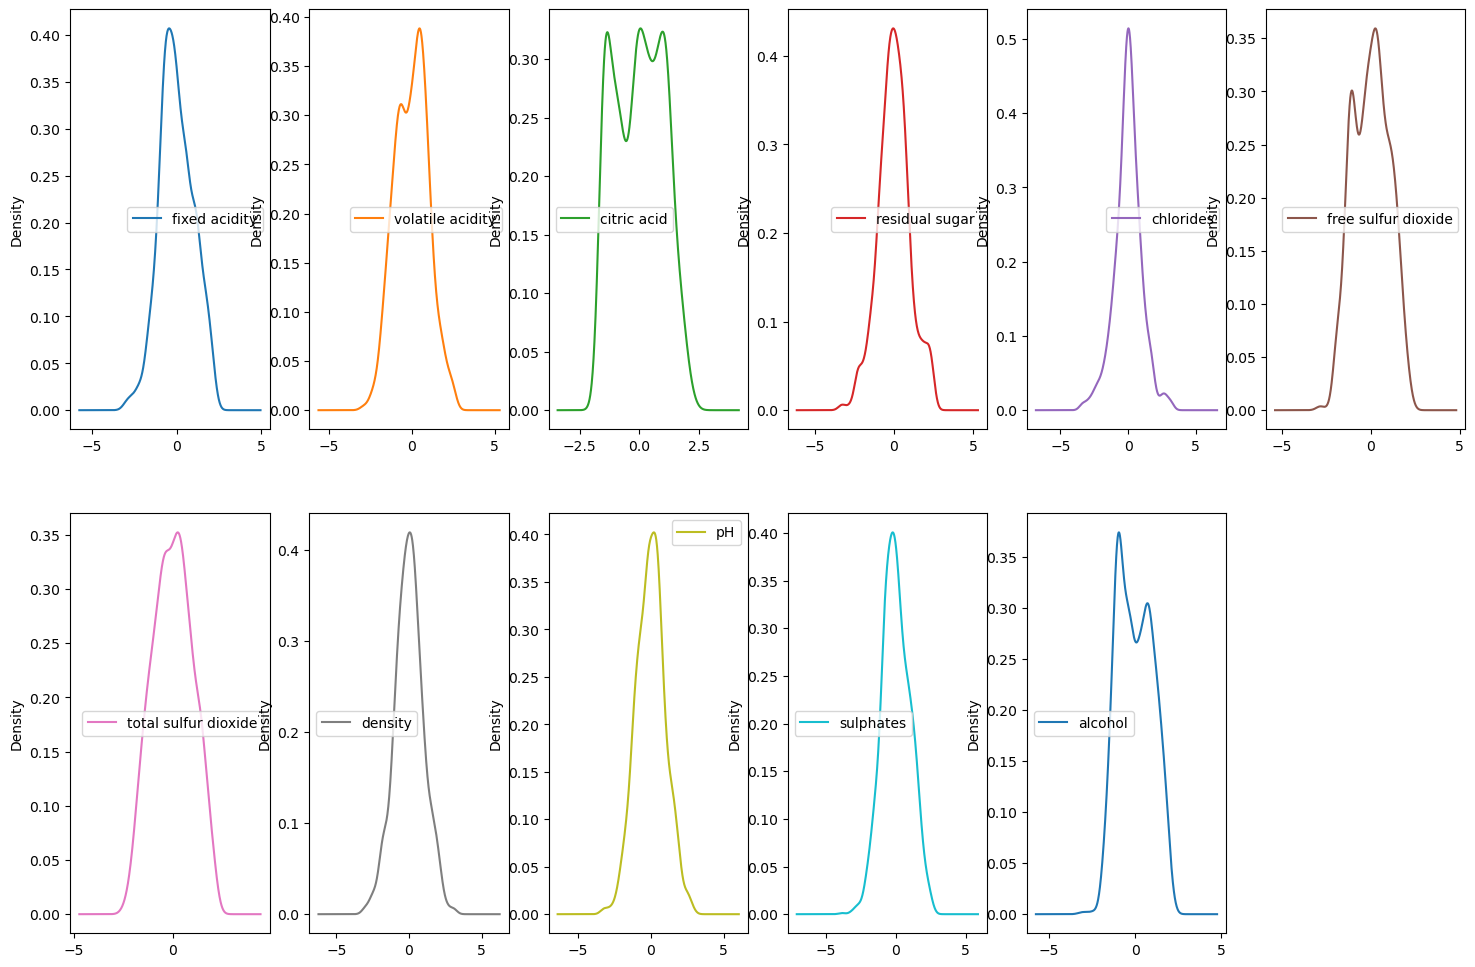

In [125]:
# Visually checking the distribution plots after skewness removal
x.plot(kind='density',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=10,figsize=(18,12))
plt.show()

# Scaling X data

In [126]:
# Applied standard scaler
# Here the standard scaler is applied eventhough skewness range is (+0.115,-0.115). Ideally scaling may not be required as skewness is small. 
# However, scaling is applied to remove remaining small skewness and converting the data to the normally distributed data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

# SMOTE for classfication

As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable

In [128]:
# Checking the value count of target column
y.value_counts()

0    1257
1     201
Name: wine_quality, dtype: int64

In [130]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [131]:
# Checking the value count of target column
y.value_counts()

0    1257
1    1257
Name: wine_quality, dtype: int64

Observations: Classes are balanced in the target column

# Model Building

In [132]:
# As target variable has two classes, we will use binary classification model and starts with LogisticRegression

In [136]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the random state value where training accuracy = testing accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print("At randome state",i, " the model performs well")
        print("At randome state:",i)
        print("Training accuracy is",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is",accuracy_score(y_test,pred_test)*100)
        print("Difference between Training and Testing accuracy is",(accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

At randome state 1  the model performs well
At randome state: 1
Training accuracy is 82.69517652909
Testing accuracy is 82.7037773359841
Difference between Training and Testing accuracy is 0.008600806894094148
At randome state 30  the model performs well
At randome state: 30
Training accuracy is 82.49627051218299
Testing accuracy is 82.50497017892644
Difference between Training and Testing accuracy is 0.00869966674345335
At randome state 212  the model performs well
At randome state: 212
Training accuracy is 82.49627051218299
Testing accuracy is 82.50497017892644
Difference between Training and Testing accuracy is 0.00869966674345335
At randome state 234  the model performs well
At randome state: 234
Training accuracy is 82.49627051218299
Testing accuracy is 82.50497017892644
Difference between Training and Testing accuracy is 0.00869966674345335
At randome state 377  the model performs well
At randome state: 377
Training accuracy is 82.49627051218299
Testing accuracy is 82.50497017892

Observations: As multple random states give same training and testing accuarcy scores, selected random state: 825

In [137]:
# Using the random state: 825 and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=825)

In [138]:
# Training the model and checking  accuracy score with the fixed random state: 825
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.827037773359841


In [139]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       268
           1       0.78      0.87      0.82       235

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.83       503
weighted avg       0.83      0.83      0.83       503



In [140]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[211  57]
 [ 30 205]]


# Cross validation for logistic regression

In [157]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score
for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print(" At CV:",j)
    print("Cross validation score is:",lsc*100)
    print("Model_accuracy_score is:",lss*100)
    print("Difference b/w Cross validation score and Model accuracy score is",lsc-lss)
    print("\n")        

 At CV: 2
Cross validation score is: 77.9236276849642
Model_accuracy_score is: 82.7037773359841
Difference b/w Cross validation score and Model accuracy score is -0.04780149651019894


 At CV: 3
Cross validation score is: 80.1909307875895
Model_accuracy_score is: 82.7037773359841
Difference b/w Cross validation score and Model accuracy score is -0.025128465483946094


 At CV: 4
Cross validation score is: 80.42622755764383
Model_accuracy_score is: 82.7037773359841
Difference b/w Cross validation score and Model accuracy score is -0.02277549778340271


 At CV: 5
Cross validation score is: 80.11144289640642
Model_accuracy_score is: 82.7037773359841
Difference b/w Cross validation score and Model accuracy score is -0.025923344395776815


 At CV: 6
Cross validation score is: 80.62848050914876
Model_accuracy_score is: 82.7037773359841
Difference b/w Cross validation score and Model accuracy score is -0.020752968268353378


 At CV: 7
Cross validation score is: 80.82393774594333
Model_accuracy

Observations: At CV=9, Difference b/w Cross validation score and Model accuracy score is less hence selected CV=9 

In [158]:
# Using fixed CV=9 and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 81.06246799795187 
The accuracy score is: 82.7037773359841
Difference is: 0.016413093380322263


# Other Classification Algorithms

In [164]:
# Checking accuracy with Naive Bayes classifier - Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8250497017892644
[[213  55]
 [ 33 202]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       268
           1       0.79      0.86      0.82       235

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.82       503
weighted avg       0.83      0.83      0.83       503



In [165]:
score=cross_val_score(gnb,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predgnb)*100)
print("Difference is:",accuracy_score(y_test,predgnb)-score)

The CV score is: 80.2689594356261 
The accuracy score is: 82.50497017892644
Difference is: 0.02236010743300343


In [162]:
# Checking accuracy with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9204771371769384
[[241  27]
 [ 13 222]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       268
           1       0.89      0.94      0.92       235

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



In [163]:
score=cross_val_score(dtc,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,preddtc)*100)
print("Difference is:",accuracy_score(y_test,preddtc)-score)

The CV score is: 87.90848836547762 
The accuracy score is: 92.04771371769384
Difference is: 0.04139225352216214


In [166]:
# Checking accuracy with KNearestNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier()
knnc.fit(x_train,y_train)
predknnc=knnc.predict(x_test)
print(accuracy_score(y_test,predknnc))
print(confusion_matrix(y_test,predknnc))
print(classification_report(y_test,predknnc))

0.8767395626242545
[[208  60]
 [  2 233]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       268
           1       0.80      0.99      0.88       235

    accuracy                           0.88       503
   macro avg       0.89      0.88      0.88       503
weighted avg       0.90      0.88      0.88       503



In [167]:
score=cross_val_score(knnc,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predknnc)*100)
print("Difference is:",accuracy_score(y_test,predknnc)-score)

The CV score is: 86.5921374523525 
The accuracy score is: 87.67395626242545
Difference is: 0.010818188100729431


In [168]:
# Checking accuracy with Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
predsgdc=sgdc.predict(x_test)
print(accuracy_score(y_test,predsgdc))
print(confusion_matrix(y_test,predsgdc))
print(classification_report(y_test,predsgdc))

0.8091451292246521
[[210  58]
 [ 38 197]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       268
           1       0.77      0.84      0.80       235

    accuracy                           0.81       503
   macro avg       0.81      0.81      0.81       503
weighted avg       0.81      0.81      0.81       503



In [169]:
score=cross_val_score(sgdc,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predsgdc)*100)
print("Difference is:",accuracy_score(y_test,predsgdc)-score)

The CV score is: 78.35808158388802 
The accuracy score is: 80.9145129224652
Difference is: 0.02556431338577181


In [170]:
# Checking accuracy with SVC classifier
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
predsvc=sv.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8986083499005965
[[226  42]
 [  9 226]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       268
           1       0.84      0.96      0.90       235

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.91      0.90      0.90       503



In [171]:
score=cross_val_score(sv,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predsvc)*100)
print("Difference is:",accuracy_score(y_test,predsvc)-score)

The CV score is: 87.58832565284177 
The accuracy score is: 89.86083499005964
Difference is: 0.022725093372178762


# Ensembling Techniques

In [147]:
# Checking accuracy with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9443339960238568
[[245  23]
 [  5 230]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       268
           1       0.91      0.98      0.94       235

    accuracy                           0.94       503
   macro avg       0.94      0.95      0.94       503
weighted avg       0.95      0.94      0.94       503



In [148]:
score=cross_val_score(RFC,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predRFC)*100)
print("Difference is:",accuracy_score(y_test,predRFC)-score)

The CV score is: 92.83822609091426 
The accuracy score is: 94.43339960238568
Difference is: 0.01595173511471426


In [191]:
# Checking accuracy with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9582504970178927
[[250  18]
 [  3 232]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       268
           1       0.93      0.99      0.96       235

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503



In [192]:
score=cross_val_score(ET,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predET)*100)
print("Difference is:",accuracy_score(y_test,predET)-score)

The CV score is: 94.86800933037493 
The accuracy score is: 95.82504970178927
Difference is: 0.009570403714143416


In [151]:
# Checking accuracy with Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9105367793240556
[[236  32]
 [ 13 222]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       268
           1       0.87      0.94      0.91       235

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.91      0.91      0.91       503



In [154]:
score=cross_val_score(GB,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predGB)*100)
print("Difference is:",accuracy_score(y_test,predGB)-score)

The CV score is: 88.6232007737384 
The accuracy score is: 91.05367793240556
Difference is: 0.024304771586671547


In [193]:
# Checking accuracy with Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8608349900596421
[[220  48]
 [ 22 213]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       268
           1       0.82      0.91      0.86       235

    accuracy                           0.86       503
   macro avg       0.86      0.86      0.86       503
weighted avg       0.87      0.86      0.86       503



In [194]:
score=cross_val_score(ABC,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predABC)*100)
print("Difference is:",accuracy_score(y_test,predABC)-score)

The CV score is: 84.52452068043466 
The accuracy score is: 86.08349900596421
Difference is: 0.015589783255295586


In [195]:
# Checking accuracy with XG Boost Classifier
from xgboost import XGBClassifier
XGBC=XGBClassifier()
XGBC.fit(x_train,y_train)
predXGBC=XGBC.predict(x_test)
print(accuracy_score(y_test,predXGBC))
print(confusion_matrix(y_test,predXGBC))
print(classification_report(y_test,predXGBC))

0.952286282306163
[[246  22]
 [  2 233]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       268
           1       0.91      0.99      0.95       235

    accuracy                           0.95       503
   macro avg       0.95      0.95      0.95       503
weighted avg       0.96      0.95      0.95       503



In [196]:
score=cross_val_score(XGBC,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predXGBC)*100)
print("Difference is:",accuracy_score(y_test,predXGBC)-score)

The CV score is: 92.83979063548955 
The accuracy score is: 95.2286282306163
Difference is: 0.02388837595126747


In [205]:
# Checking accuracy with Voting Classifier - Hard Vote
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))
VC_hard=VotingClassifier(estimators=estimator,voting="hard")
VC_hard.fit(x_train,y_train)
predVC_hard=VC_hard.predict(x_test)
print(accuracy_score(y_test,predVC_hard))
print(confusion_matrix(y_test,predVC_hard))
print(classification_report(y_test,predVC_hard))

0.9085487077534792
[[227  41]
 [  5 230]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       268
           1       0.85      0.98      0.91       235

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.92      0.91      0.91       503



In [206]:
score=cross_val_score(VC_hard,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predVC_hard)*100)
print("Difference is:",accuracy_score(y_test,predVC_hard)-score)

The CV score is: 89.7363031233999 
The accuracy score is: 90.85487077534792
Difference is: 0.011185676519480103


In [207]:
# Checking accuracy with Voting Classifier - Soft Vote
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))
VC_soft=VotingClassifier(estimators=estimator,voting="soft")
VC_soft.fit(x_train,y_train)
predVC_soft=VC_soft.predict(x_test)
print(accuracy_score(y_test,predVC_soft))
print(confusion_matrix(y_test,predVC_soft))
print(classification_report(y_test,predVC_soft))

score=cross_val_score(VC_soft,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predVC_soft)*100)
print("Difference is:",accuracy_score(y_test,predVC_soft)-score)

0.9343936381709742
[[239  29]
 [  4 231]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.94       268
           1       0.89      0.98      0.93       235

    accuracy                           0.93       503
   macro avg       0.94      0.94      0.93       503
weighted avg       0.94      0.93      0.93       503

The CV score is: 90.77132047562154 
The accuracy score is: 93.43936381709742
Difference is: 0.026680433414758786


Observations: Out of all algorithms checked, ExtraTreesClassifier is selected for hyper parameter tuning as the difference between model and cross-validation score is less.

# Hyper Parameter Tuning

In [208]:
# Hyper parameter tuning on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

# Defining parameters for Extra Trees Classifier
parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [209]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)  # Defining instance for GridSearchCV

In [210]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [211]:
GCV.best_params_   # printing the best parameters

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [212]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
Final_model=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=100, n_jobs=-2,random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.81908548707754
[[253  15]
 [  1 234]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.94      1.00      0.97       235

    accuracy                           0.97       503
   macro avg       0.97      0.97      0.97       503
weighted avg       0.97      0.97      0.97       503



In [213]:
score=cross_val_score(Final_model,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 94.55054901291462 
The accuracy score is: 96.81908548707754
Difference is: 0.0226853647416293


# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

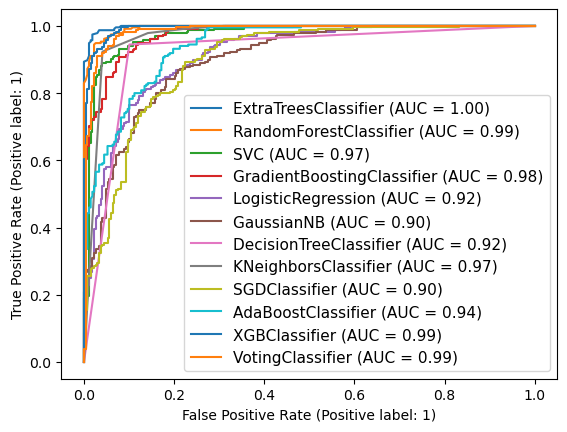

In [219]:
# Checking AUC ROC Curve to compare the performance among multiple models

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# Initially Plotting the AUC ROC curve for Extra Tree Classifier

disp=plot_roc_curve(ET,x_test,y_test) 

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of Extra Tree Classifier

plot_roc_curve(RFC,x_test,y_test,ax=disp.ax_)   

plot_roc_curve(sv,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knnc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgdc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ABC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(XGBC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(VC_soft,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

Observations:
Most of models are performing well. ExtraTreesClassifier is the best one among all models from this plot. Also it is the best based on the accuracy score and the least difference between model accuracy score & cross validation score. Hence saving ExtraTreesClassifier as the final model for deployment

# Model Saving

In [101]:
import pickle
filename='red_wine_quality_prediction.pkl'
pickle.dump(ET, open(filename,'wb'))  # saving the ExtraTreesClassifier model

# Conclusion

In [102]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ET.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
498,0,1
499,1,1
500,1,1
501,0,0


Additional Notes:
1. As the dataset is small with 11 no. of x columns, multi collinearity is not checked and didn't apply VIF to remove multi collinearity as this will lead to data loss
2. Didn't use PCA as the dataset is small